In [10]:
import pandas as pd
data = pd.read_csv('./datasets_generated/Outlier-Approach1.csv')
data.shape

(182320, 45)

In [11]:
from pandas import read_csv, DataFrame, Series
from sklearn.preprocessing import StandardScaler

file_name = "class_covid_pos"
target = "CovidPos"

#vars: list[str] = data.columns.to_list()
#vars.remove('CovidPos')

target_data: Series = data.pop(target)

transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data)
df_zscore = DataFrame(transf.transform(data), index=data.index)
df_zscore[target] = target_data
#vars.append('CovidPos')
#df_zscore.columns = vars
df_zscore.to_csv(f"./{file_name}_scaled_zscore.csv", index=False)

1
5
10
15
20
25
{'accuracy': 0.6086733947637852, 'recall': 0.32038834951456313, 'precision': 0.3235706099579778, 'auc': 0.523406823467175, 'f1': 0.32197161682716674}


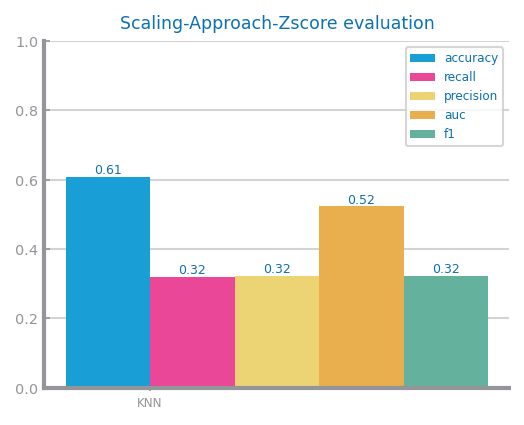

In [12]:
# Evaluation Approach#1
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split


# Split the DataFrame into train and test
train, test = train_test_split(df_zscore, test_size=0.3, random_state=42)

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "Scaling-Approach-Zscore"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target,  metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
#savefig(f"./{file_tag}_eval.png")
show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv, DataFrame, Series

#vars: list[str] = data.columns.to_list()
#vars.remove('CovidPos')
target = "CovidPos"
target_data: Series = data.pop(target)

transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(data)
df_minmax = DataFrame(transf.transform(data), index=data.index)
df_minmax[target] = target_data
#vars.append('CovidPos')
#df_minmax.columns = vars
df_minmax.to_csv(f"./class_pos_covid_scaled_minmax.csv", index=False)

1
5
10
15
20
25
{'accuracy': 0.6068816732485008, 'recall': 0.3213340058000252, 'precision': 0.32190223569533916, 'auc': 0.5224247409645951, 'f1': 0.32161786976274614}


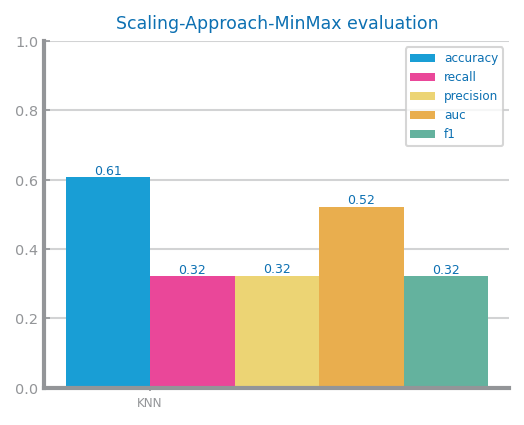

In [ ]:
# Evaluation Approach #2
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split


# Split the DataFrame into train and test
train, test = train_test_split(df_minmax, test_size=0.3, random_state=42)

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "Scaling-Approach-MinMax"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
#savefig(f"./{file_tag}_eval.png")
show()

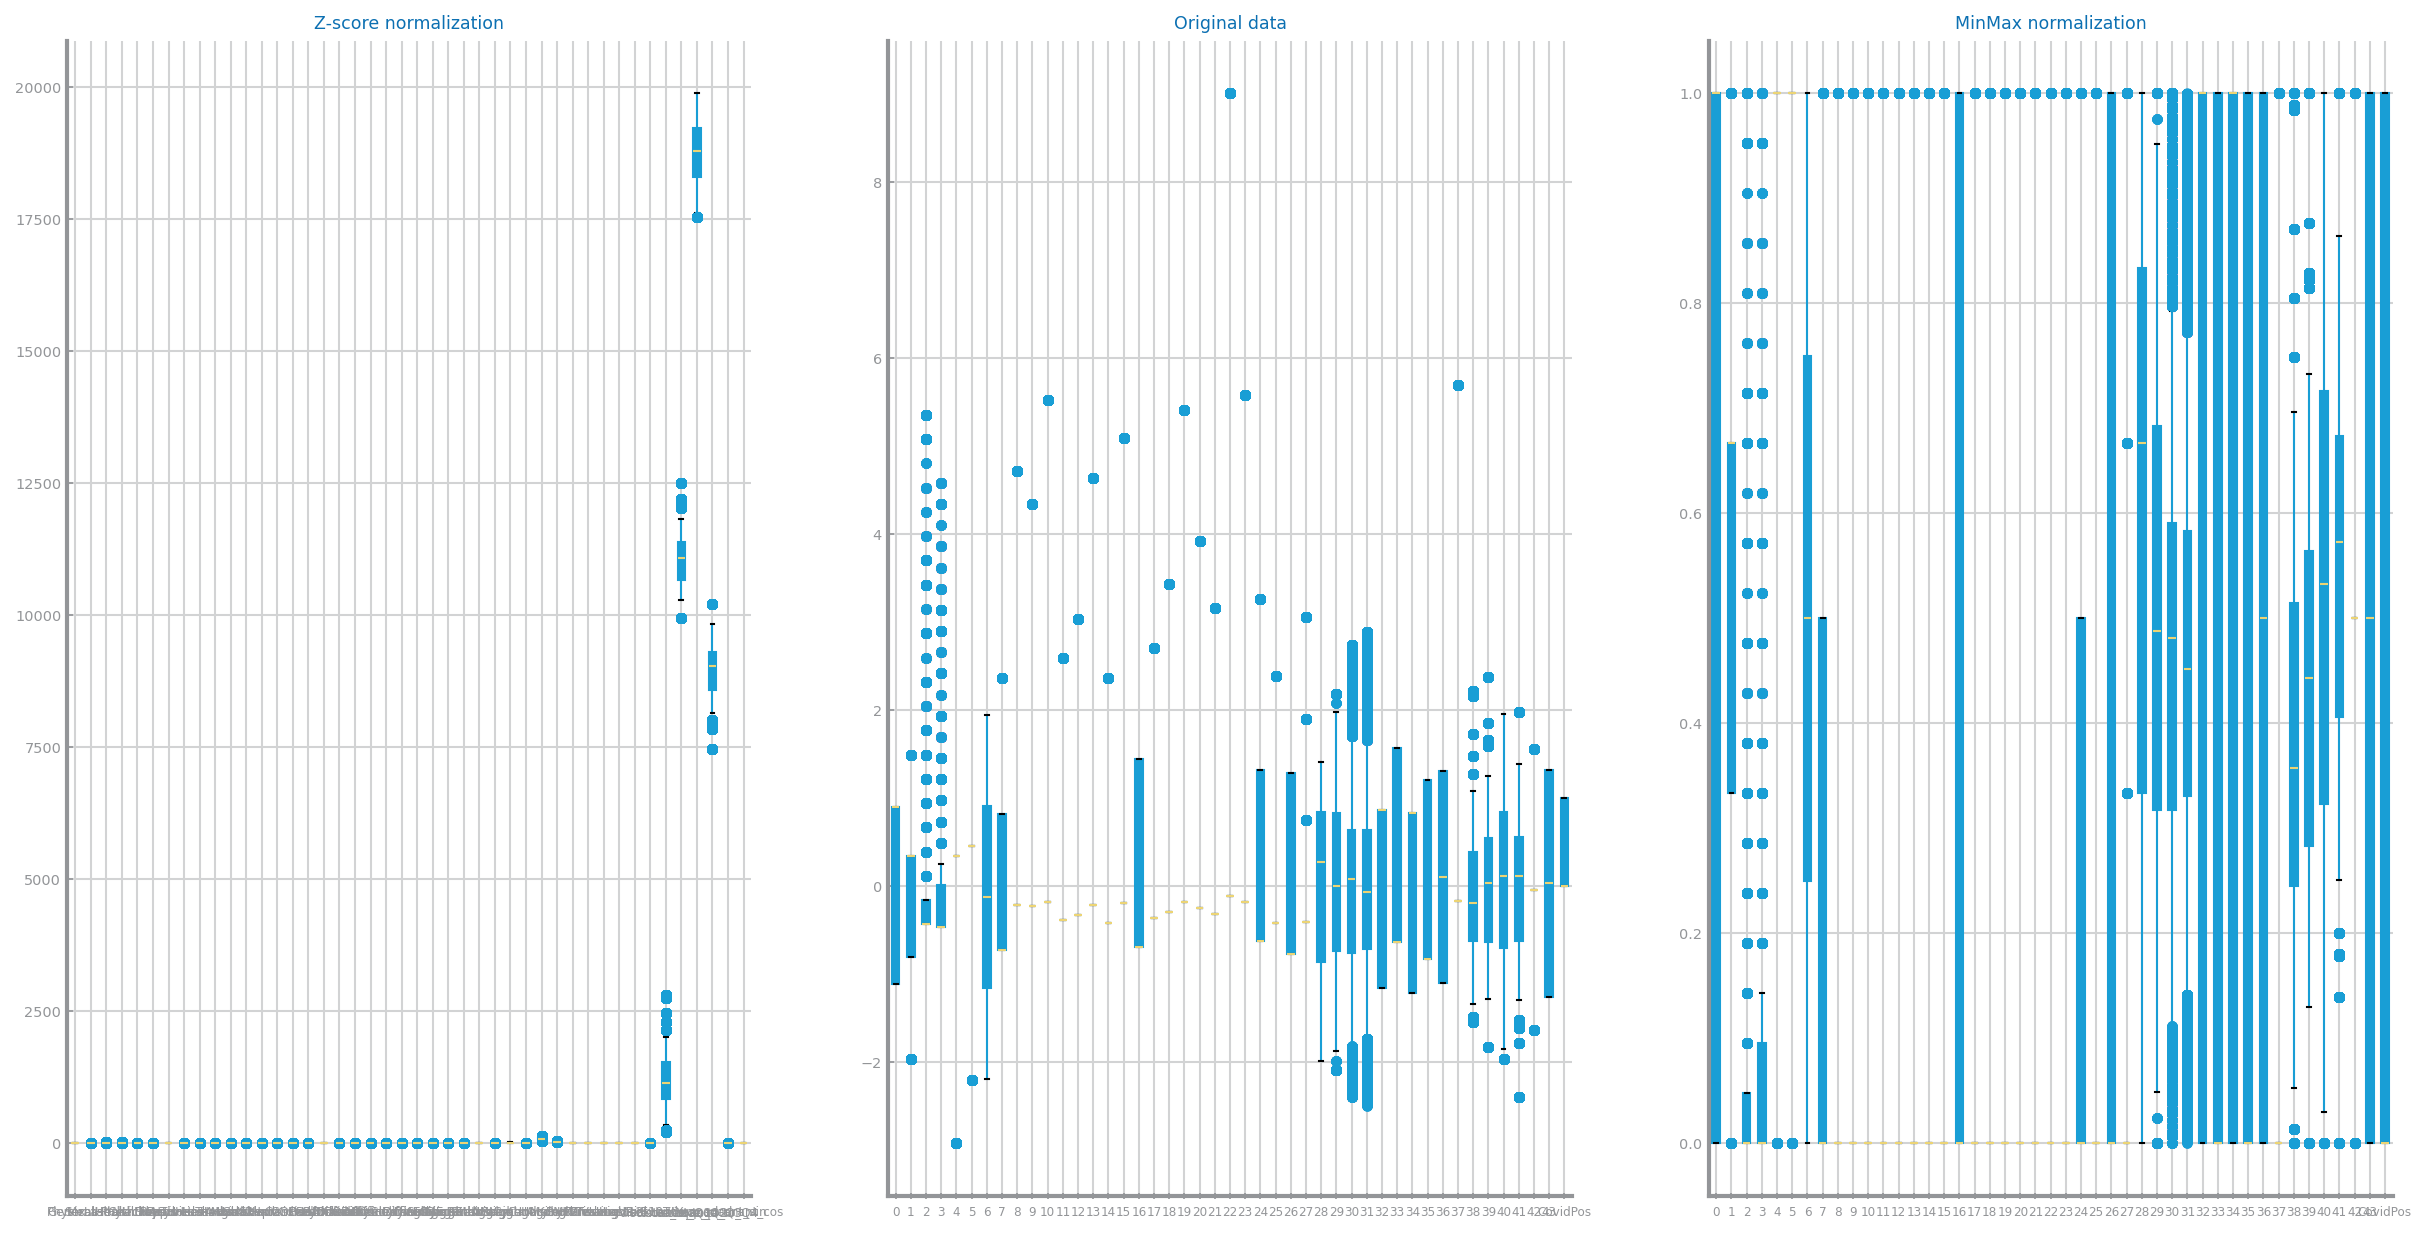

In [ ]:
# NOT NEEDED TO RUN IF ERROR DONT WORRY ABOUT IT
from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
data.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
df_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_minmax.boxplot(ax=axs[0, 2])
show()